In [1]:
import pandas as pd

import os
working_directory = os.getcwd()
print(working_directory)

/Users/elizabeth


In [6]:
path = working_directory + '/Downloads/dc_marvel_movie_performance.csv'
movie_performance = pd.read_csv(path , encoding='latin1', sep=";")
movie_performance.head()

,Film,U.S. release date,Box office gross Domestic (U.S. and Canada ),Box office gross Other territories,Box office gross Worldwide,Budget,MCU,Phase,Distributor,MPAA Rating,...,Character Family,Domestic %,Gross to Budget,Rotten Tomatoes Critic Score,Male/Female-led,Year,Inflation Adjusted Worldwide Gross,Inflation Adjusted Budget,2.5x prod,Break Even
0,Superman,15/12/1978,"$134,478,449","$166,000,000","$300,478,449","$55,000,000",False,NaN,Warner Bros.,PG,...,Superman,45%,5.46,94,Male,1978,"$1,404,237,104","$257,033,544","$137,500,000",Success
1,Superman II,19/06/1981,"$108,185,706","$108,200,000","$216,385,706","$54,000,000",False,NaN,Warner Bros.,PG,...,Superman,50%,4.01,83,Male,1981,"$725,336,273","$181,010,842","$135,000,000",Success
2,Superman III,17/06/1983,"$59,950,623","$20,300,000","$80,250,623","$39,000,000",False,NaN,Warner Bros.,PG,...,Superman,75%,2.06,29,Male,1983,"$245,506,947","$119,310,861","$97,500,000",Flop
3,Supergirl,21/11/1984,"$14,296,438",NaN,"$14,296,438","$35,000,000",False,NaN,Tri-Star Pictures,PG,...,Superman,100%,0.41,8,Female,1984,"$41,926,345","$102,642,497","$87,500,000",Flop
4,Howard the Duck,08/01/1986,"$16,295,774","$21,667,000","$37,962,774","$37,000,000",False,NaN,Universal Pictures,PG,...,Howard the Duck,43%,1.03,13,Male,1986,"$37,962,774","$37,000,000","$92,500,000",Flop


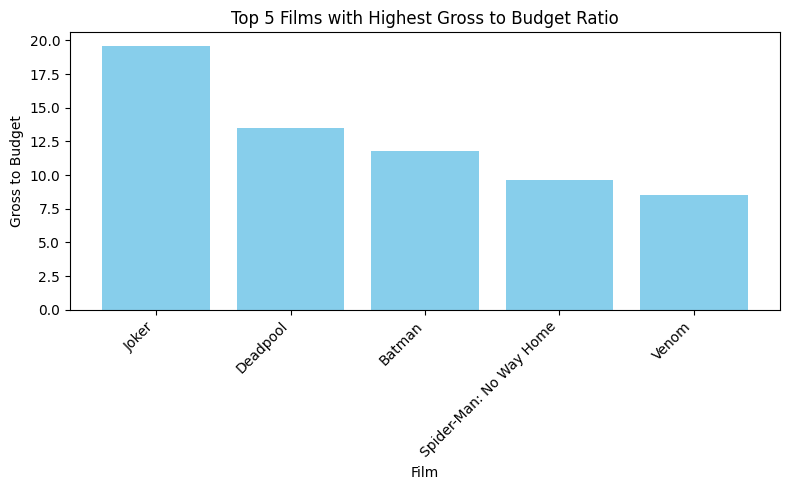

In [9]:

import matplotlib.pyplot as plt

# Sort the DataFrame by "Gross to Budget" in descending order and select the top 5 films
top_5_films = movie_performance.nlargest(5, 'Gross to Budget')

# Plotting
plt.figure(figsize=(8, 5))
plt.bar(top_5_films['Film'], top_5_films['Gross to Budget'], color='skyblue')
plt.xlabel('Film')
plt.ylabel('Gross to Budget')
plt.title('Top 5 Films with Highest Gross to Budget Ratio')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [10]:
# Define recommended column as in Task 1f
bins = [-float('inf'), 39, 59, 89, float('inf')]
labels = ['Strongly No', 'No', 'Yes', 'Strongly Yes']

# Add a new column "Recommended" based on the "Rotten Tomatoes Critic Score"
movie_performance['Recommended'] = pd.cut(movie_performance['Rotten Tomatoes Critic Score'], bins=bins, labels=labels)

# Print the DataFrame to verify the new column
print(movie_performance.head())

              Film U.S. release date  \
0         Superman        15/12/1978   
1      Superman II        19/06/1981   
2     Superman III        17/06/1983   
3        Supergirl        21/11/1984   
4  Howard the Duck        08/01/1986   

  Box office gross Domestic (U.S. and Canada )  \
0                                $134,478,449    
1                                $108,185,706    
2                                 $59,950,623    
3                                 $14,296,438    
4                                 $16,295,774    

  Box office gross Other territories Box office gross Worldwide        Budget  \
0                      $166,000,000               $300,478,449   $55,000,000    
1                      $108,200,000               $216,385,706   $54,000,000    
2                       $20,300,000                $80,250,623   $39,000,000    
3                                NaN               $14,296,438   $35,000,000    
4                       $21,667,000                $3

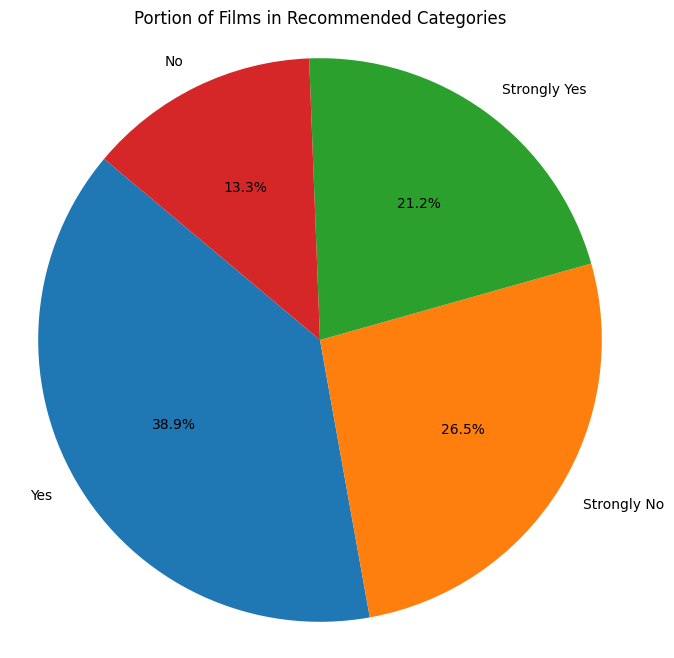

In [12]:
# Calculate the portion of films falling into each category of the "Recommended" column
portion = movie_performance['Recommended'].value_counts(normalize=True) * 100

# Plotting
plt.figure(figsize=(8, 8))
plt.pie(portion, labels=portion.index, autopct='%1.1f%%', startangle=140)
plt.title('Portion of Films in Recommended Categories')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()